In [1]:
from utils import *
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import glob
from joblib import Parallel, delayed

In [2]:
def load_difference(transform):
    files = glob.glob(f'difference/*__*__{transform}*__*.csv')
    print(f'Loaded {len(files)} files')
    dfs = Parallel(n_jobs=-1)(delayed(lambda file: pd.read_csv(file, index_col=False))(file=file) for file in files)
    df = pd.concat(dfs)
    df['level'] = df['transform'].apply(lambda x: float(x.split(';')[1]))
    df['transform_type'] = df['transform'].apply(lambda x: x.split(';')[0])
    return df

transform_name = 'WhiteNoise'

df = load_difference(transform_name)
df

Loaded 2000 files


dataset    method           transform  seed  accuracy  \
0          SmoothSubspace       cnn        WhiteNoise;0     3     0.500   
0                   Plane       cnn   WhiteNoise;0.0001     9     0.500   
0                   Plane    rocket  WhiteNoise;0.00001     7     0.500   
0                   Plane       cnn      WhiteNoise;0.1     1     0.525   
0                   Plane  tsforest      WhiteNoise;1.0     4     1.000   
..                    ...       ...                 ...   ...       ...   
0            WordSynonyms   catch22     WhiteNoise;10.0     8     1.000   
0          SmoothSubspace   tsfresh        WhiteNoise;0     5     0.500   
0                     Car    rocket     WhiteNoise;10.0     9     1.000   
0   ChlorineConcentration       cnn     WhiteNoise;10.0     1     0.975   
0   ChlorineConcentration    rocket  WhiteNoise;0.00001     8     0.500   

       level transform_type  
0    0.00000     WhiteNoise  
0    0.00010     WhiteNoise  
0    0.00001     WhiteNoise  
0    0.10000     WhiteNoise  
0    1.00000     WhiteNoise  
..       ...            ...  
0   10.00000     WhiteNoise  
0    0.00000     WhiteNoise  
0   10.00000     WhiteNoise  
0   10.00000     WhiteNoise  
0    0.00001     WhiteNoise  

[2000 rows x 7 columns]

In [3]:
df['method'].unique()

array(['cnn', 'rocket', 'tsforest', 'tsfresh', 'catch22'], dtype=object)

In [4]:
#df.query('method=="rocket"')

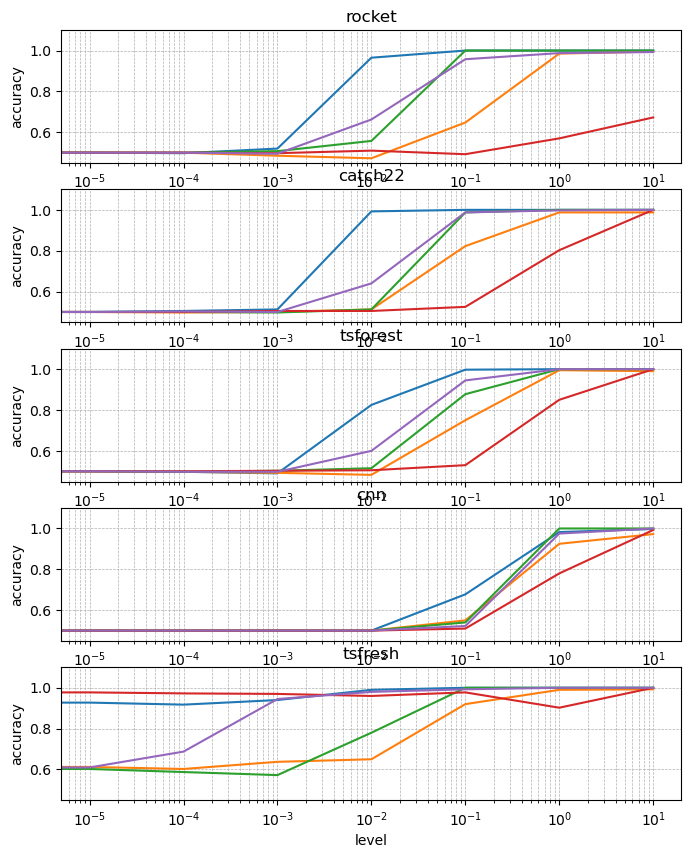

In [5]:
fig, axes = plt.subplots(5, 1, figsize=(8, 10))
sns.lineplot(data=df.query('method=="rocket"').sort_values('dataset'), x='level', y='accuracy', hue='dataset', ax=axes[0], errorbar=None)
axes[0].set_xscale('log')
axes[0].set_title('rocket')
axes[0].get_legend().remove()

sns.lineplot(data=df.query('method=="catch22"').sort_values('dataset'), x='level', y='accuracy', hue='dataset', ax=axes[1], errorbar=None)
axes[1].set_xscale('log')
axes[1].set_title('catch22')
axes[1].get_legend().remove()

sns.lineplot(data=df.query('method=="tsforest"').sort_values('dataset'), x='level', y='accuracy', hue='dataset', ax=axes[2], errorbar=None)
axes[2].set_xscale('log')
axes[2].set_title('tsforest')
axes[2].get_legend().remove()

sns.lineplot(data=df.query('method=="cnn"').sort_values('dataset'), x='level', y='accuracy', hue='dataset', ax=axes[3], errorbar=None)
axes[3].set_xscale('log')
axes[3].set_title('cnn')
axes[3].get_legend().remove()

sns.lineplot(data=df.query('method=="tsfresh"').sort_values('dataset'), x='level', y='accuracy', hue='dataset', ax=axes[4], errorbar=None)
axes[4].set_xscale('log')
axes[4].set_title('tsfresh')
axes[4].get_legend().remove()

for ax in axes:
    ax.set_ylim(0.45, 1.1)
    #ax.set_ylim(0.45, 1.1)
    ax.grid(True, which="both", linestyle="--", linewidth=0.5)
    
plt.savefig(f'figures/{transform_name}_diff_algos_datasets.pdf', bbox_inches='tight', pad_inches=0)

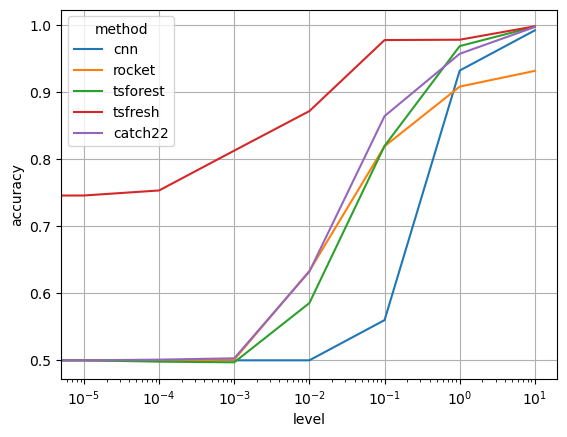

In [6]:
sns.lineplot(data=df, x='level', y='accuracy', hue='method', errorbar=None)
plt.xscale('log')
plt.grid()
plt.savefig(f'figures/{transform_name}_diff_algos.pdf', bbox_inches='tight', pad_inches=0)

In [7]:
#transform = 'WhiteNoise;0.005'
#method = 'rocket'
#seed = 0
#
#for dataset in ['Car']:
#    X_train, X_test, y_train, y_test = read_dataset(dataset)
#    X_train, X_test = interpolate_scale(X_train, X_test)
#    X_train, X_test = X_train.sample(n=20, replace=True), X_test.sample(n=20, replace=True)
#    transformation = transformation_factory(transform)
#    X_train_transformed = transformation(X_train.copy())
#    X_test_transformed = transformation(X_test.copy())
#    
#    clf = classifiers_factory(method, seed)
#    print('Training')
#    clf.fit(pd.concat([X_train, X_train_transformed], axis=0).reset_index(drop=True), ['o']*len(X_train)+['t']*len(X_train_transformed))
#    y_pred = clf.predict(pd.concat([X_test, X_test_transformed], axis=0).reset_index(drop=True))
#    accuracy = accuracy_score(['o']*len(X_test)+['t']*len(X_test_transformed), y_pred)
#    print(accuracy)